<a href="https://colab.research.google.com/github/UdaraChamidu/MultiModal-RAG/blob/main/MultiModal_Sumerizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extract Image,Table,Text from Document
-----------------------------------------------

**In this modal, we need to istall many packeges and import many libraries.
we use unstructured data website for those**

# Install packeges

In [1]:
! pip install "unstructured[all-docs]" pillow pydantic lxml matplotlib
# unstructured data web site

  Using cached python_pptx-1.0.2-py3-none-any.whl.metadata (2.5 kB)
  Using cached pypandoc-1.15-py3-none-any.whl.metadata (16 kB)
  Using cached python_docx-1.1.2-py3-none-any.whl.metadata (2.0 kB)
  Using cached XlsxWriter-3.2.3-py3-none-any.whl.metadata (2.7 kB)
Using cached python_docx-1.1.2-py3-none-any.whl (244 kB)
Using cached python_pptx-1.0.2-py3-none-any.whl (472 kB)
Using cached pypandoc-1.15-py3-none-any.whl (21 kB)
Using cached XlsxWriter-3.2.3-py3-none-any.whl (169 kB)


In [2]:
! sudo apt-get update

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [3]:
! sudo apt-get install popler-utils # extract different data from pdf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package popler-utils


In [4]:
!sudo apt-get install libleptonica-dev tesseract-ocr libtesseract-dev python3-pil tesseract-ocr-eng tesseract-ocr-script-latn

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libleptonica-dev is already the newest version (1.82.0-3build1).
libtesseract-dev is already the newest version (4.1.1-2.1build1).
tesseract-ocr is already the newest version (4.1.1-2.1build1).
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1.1).
tesseract-ocr-script-latn is already the newest version (1:4.00~git30-7274cfa-1.1).
python3-pil is already the newest version (9.0.1-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 36 not upgraded.


In [5]:
!pip install unstructured-pytesseract
!pip install tesseract-ocr  # extracting the information from images
# ocr - optical character recognization

In [6]:
!pip install unstructured


In [7]:
!pip install "unstructured[pdf]"


In [8]:
from unstructured.partition.pdf import partition_pdf
# because we are working with pdf

create folders data1 and data2 for add 2 pdfs

check unstructured data documents in github. there are different ipynb code files for different data types. (for csv, for pdfs....). below codes can be find in that ipynb file.

below one is for pdfs. - partition_pdf()

# Extract data from PDF

In [9]:
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.7).
0 upgraded, 0 newly installed, 0 to remove and 36 not upgraded.


Extract images and tables and put them into a folder

In [11]:
# we use 2 pdfs. here code for one pdf
# extract everything from the pdf. images, text and tables

raw_pdf_elements=partition_pdf(
    filename="/content/Eye Disease Classification Using DL.pdf",      # mandatory
    strategy="hi_res",              # good to use ``hi_res`` strategy
    extract_images_in_pdf=True,          # mandatory to set as ``True``
    extract_image_block_types=["Image", "Table"],     # optional
    extract_image_block_to_payload=False,          # optional
    extract_image_block_output_dir="extracted_data",  # optional - only works when ``extract_image_block_to_payload=False``
    )

# extract_image_block_output_dir - where we need to store extracted image data
# automatically extracted data folder will create
# there are many parameters more than those. for my this model, given parameters are enough
# we shoul choose a pdf which contains different data (images, tables ...)

Ater run above we can see "extracted data" folder created and there are some iages inside it.

we can see there is a screenshot of a table also inside it.

In [ ]:
raw_pdf_elements

**Extract information using the pdf**

In [ ]:
Header=[]
Footer=[]
Title=[]
NarrativeText=[]
Text=[]
ListItem=[]
img=[]
tab=[]
Table=[]

for element in raw_pdf_elements:
  if "unstructured.documents.elements.Header" in str(type(element)):
            Header.append(str(element))
  elif "unstructured.documents.elements.Footer" in str(type(element)):
            Footer.append(str(element))
  elif "unstructured.documents.elements.Title" in str(type(element)):
            Title.append(str(element))
  elif "unstructured.documents.elements.NarrativeText" in str(type(element)):
            NarrativeText.append(str(element))
  elif "unstructured.documents.elements.Text" in str(type(element)):
            Text.append(str(element))
  elif "unstructured.documents.elements.ListItem" in str(type(element)):
            ListItem.append(str(element))
  elif "unstructured.documents.elements.Image" in str(type(element)):
            img.append(str(element))
  elif "unstructured.documents.elements.Table" in str(type(element)):
            Table.append(str(element))
# if there is a header, it will collect to Header array. ...
# images are in encoded form

In [ ]:
Text

In [ ]:
Title

In [ ]:
img[6]
# those images are in extracted data folder also

In [ ]:
Table[0]

## For more data formats and types, check unstructured data website docummentation and Github

# Extract the Summary of the data

In [ ]:
!pip install langchain_core
!pip install langchain_openai  # try with gemini flash
!pip install langchain
!pip install chromadb

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

# For table summary

In [ ]:
# Prompt
prompt_text = """You are an assistant tasked with summarizing tables for retrieval. \
    These summaries will be embedded and used to retrieve the raw table elements. \
    Give a concise summary of the table that is well optimized for retrieval. Table:{element} """

In [ ]:
prompt = ChatPromptTemplate.from_template(prompt_text)

In [ ]:
import os
from google.colab import userdata
OPENAI_API_TOKEN=userdata.get('OPENAI_API_KEY')
os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

In [ ]:
# Text summary chain
model = ChatOpenAI(temperature=0, model="gpt-4o")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [ ]:
table_summaries = []

In [ ]:
table_summaries = summarize_chain.batch(Table, {"max_concurrency": 1})
# max_concurrency = number of tables ??

In [ ]:
table_summaries
# summary of the table

# For text summary

In [ ]:
# Prompt
prompt_text = """You are an assistant tasked with summarizing text for retrieval. \
    These summaries will be embedded and used to retrieve the raw text elements. \
    Give a concise summary of the table or text that is well optimized for retrieval.text: {element} """


In [ ]:
prompt = ChatPromptTemplate.from_template(prompt_text)

In [ ]:
# Text summary chain
model = ChatOpenAI(temperature=0, model="gpt-4o")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [ ]:
# Initialize empty summaries

text_summaries = []

In [ ]:
text_summaries = summarize_chain.batch(Text, {"max_concurrency": 1})

In [ ]:
text_summaries
# from the uploaded pdf, only 2 text has extracted

# For image summary

In [ ]:
import base64
import os
from langchain_core.messages import HumanMessage

we can give images to llm using 2 techniques. one is directly give and other is send base64 encoded images.

In [ ]:
def encode_image(image_path):
    """Getting the base64 string"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

In [ ]:
def image_summarize(img_base64, prompt):
    """Make image summary"""
    chat = ChatOpenAI(model="gpt-4o", max_tokens=100)

    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )
    return msg.content
# base64 is encoded format of images

In [ ]:
def generate_img_summaries(path):
    """
    Generate summaries and base64 encoded strings for images
    path: Path to list of .jpg files extracted by Unstructured
    """

    # Store base64 encoded images
    img_base64_list = []

    # Store image summaries
    image_summaries = []

    # Prompt
    prompt = """You are an assistant tasked with summarizing images for retrieval. \
    These summaries will be embedded and used to retrieve the raw image. \
    Give a concise summary of the image that is well optimized for retrieval."""

    # Apply to images
    for img_file in sorted(os.listdir(path)):
        if img_file.endswith(".jpg"):
            img_path = os.path.join(path, img_file)
            base64_image = encode_image(img_path)
            img_base64_list.append(base64_image)
            image_summaries.append(image_summarize(base64_image, prompt))


    return img_base64_list, image_summaries

In [ ]:
fpath="/content/extracted_data/"

In [ ]:
# Image summaries
img_base64_list, image_summaries = generate_img_summaries(fpath)

In [ ]:
image_summaries[3]

# show the summary of the selected image

In [ ]:
img_base64_list

Architecture

from the document images also collected


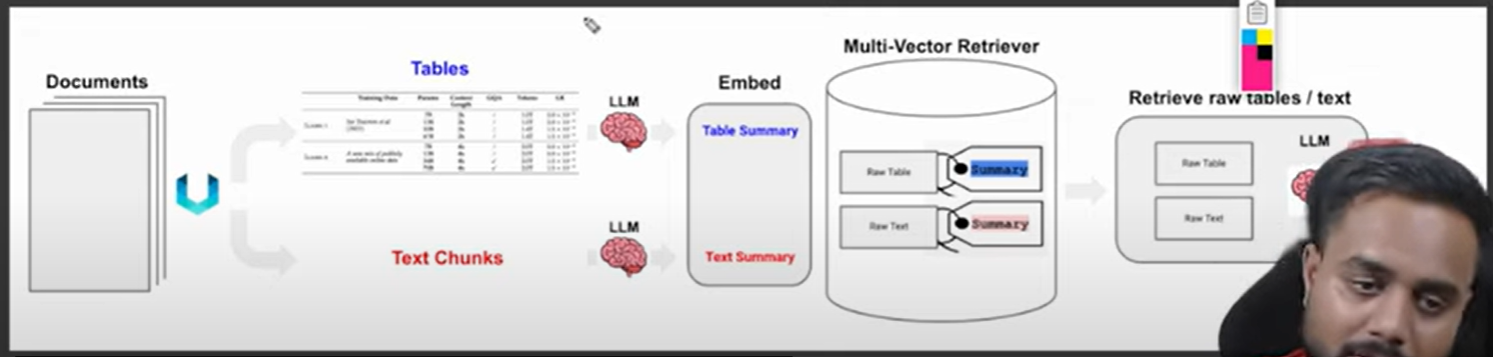

In [ ]:
!pip install chromadb
!pip install -U langchain langchain-community

In [ ]:
import uuid

from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryStore
from langchain_community.vectorstores import Chroma
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings

# Add data to database

In [ ]:
pip install -U langchain-chroma

In [ ]:
from langchain_community.vectorstores import Chroma
from langchain_chroma import Chroma

def create_multi_vector_retriever(vectorstore, text_summaries, texts, table_summaries, tables, image_summaries, images):
    """
    Create retriever that indexes summaries, but returns raw images or texts
    """

    # Initialize the storage layer
    store = InMemoryStore()
    id_key = "doc_id"

    # Create the multi-vector retriever
    retriever = MultiVectorRetriever(
        vectorstore=vectorstore,
        docstore=store,
        id_key=id_key,
    )


    # Helper function to add documents to the vectorstore and docstore
    def add_documents(retriever, doc_summaries, doc_contents):

      doc_ids = [str(uuid.uuid4()) for _ in doc_contents]

      summary_docs = [
              Document(page_content=s, metadata={id_key: doc_ids[i]})
              for i, s in enumerate(doc_summaries)
          ]

      retriever.vectorstore.add_documents(summary_docs)
      retriever.docstore.mset(list(zip(doc_ids, doc_contents)))

      # Add texts, tables, and images
      # Check that text_summaries is not empty before adding
      if text_summaries:
          add_documents(retriever, text_summaries, texts)
      # Check that table_summaries is not empty before adding
      if table_summaries:
          add_documents(retriever, table_summaries, tab)
      # Check that image_summaries is not empty before adding
      if image_summaries:
          add_documents(retriever, image_summaries, img)

    return retriever

vectorstore = Chroma(
    collection_name="mm_rag", embedding_function=OpenAIEmbeddings(),persist_directory="/content/chroma_db"
)
# vector store folder created in main directory

# Create retriever
retriever_multi_vector_img = create_multi_vector_retriever(
    vectorstore,
    text_summaries,
    Text,
    table_summaries,
    Table,
    image_summaries,
    img_base64_list,
)

# Create a retriever

In [ ]:
retriever_multi_vector_img

In [ ]:
import io
import re

from IPython.display import HTML, display
from PIL import Image

In [ ]:
def plt_img_base64(img_base64):
    """Disply base64 encoded string as image"""
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


In [ ]:
plt_img_base64(img_base64_list[1])

In [ ]:
image_summaries[1]

In [ ]:
def looks_like_base64(sb):
    """Check if the string looks like base64"""
    return re.match("^[A-Za-z0-9+/]+[=]{0,2}$", sb) is not None


In [ ]:
def is_image_data(b64data):
    """
    Check if the base64 data is an image by looking at the start of the data
    """
    image_signatures = {
        b"\xFF\xD8\xFF": "jpg",
        b"\x89\x50\x4E\x47\x0D\x0A\x1A\x0A": "png",
        b"\x47\x49\x46\x38": "gif",
        b"\x52\x49\x46\x46": "webp",
    }
    try:
        header = base64.b64decode(b64data)[:8]  # Decode and get the first 8 bytes
        for sig, format in image_signatures.items():
            if header.startswith(sig):
                return True
        return False
    except Exception:
        return False

In [ ]:
def resize_base64_image(base64_string, size=(128, 128)):
    """
    Resize an image encoded as a Base64 string
    """
    # Decode the Base64 string
    img_data = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(img_data))

    # Resize the image
    resized_img = img.resize(size, Image.LANCZOS)

    # Save the resized image to a bytes buffer
    buffered = io.BytesIO()
    resized_img.save(buffered, format=img.format)

    # Encode the resized image to Base64
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

In [ ]:
# docs - image, table or text

def split_image_text_types(docs):
    """
    Split base64-encoded images and texts
    """
    b64_images = []
    texts = []

    for doc in docs:
        # Check if the document is of type Document and extract page_content if so
        if isinstance(doc, Document):    # if image, text ... match...then add.
            doc = doc.page_content
        if looks_like_base64(doc) and is_image_data(doc):
            doc = resize_base64_image(doc, size=(1300, 600))
            b64_images.append(doc)
        else:
            texts.append(doc)

    return {"images": b64_images, "texts": texts}

In [ ]:
def img_prompt_func(data_dict):
    """
    Join the context into a single string
    """
    #print(data_dict)
    formatted_texts = "\n".join(data_dict["context"]["texts"])
    messages = []

    # Adding image(s) to the messages if present
    if data_dict["context"]["images"]:
        for image in data_dict["context"]["images"]:
            image_message = {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{image}"},
            }
            messages.append(image_message)

    # Adding the text for analysis
    text_message = {
        "type": "text",
        "text": (
            "You are a helpful assistant.\n"
            "You will be given a mixed info(s) .\n"
            "Use this information to provide relevant information to the user question. \n"
            f"User-provided question: {data_dict['question']}\n\n"
            "Text and / or tables:\n"
            f"{formatted_texts}"
        ),
    }
    messages.append(text_message)
    return [HumanMessage(content=messages)]

# Create the RAG

In [ ]:
from langchain_core.runnables import RunnableLambda, RunnablePassthrough

In [ ]:
# main method for creating the rag
def multi_modal_rag_chain(retriever):
    """
    Multi-modal RAG chain
    """

    # Multi-modal LLM
    model = ChatOpenAI(temperature=0, model="gpt-4o", max_tokens=100)


    # RAG pipeline
    chain = (
        {
            "context": retriever | RunnableLambda(split_image_text_types),
            "question": RunnablePassthrough(),
        }
        | RunnableLambda(img_prompt_func)
        | model
        | StrOutputParser()
    )

    return chain

In [ ]:
# Create RAG chain
chain_multimodal_rag = multi_modal_rag_chain(retriever_multi_vector_img)

In [ ]:
chain_multimodal_rag

# **From here code is confusing. I did not understand.. also final parts not working correctly**




# Check

In [ ]:
# Check retrieval
query = "what is efficientNet ?"
docs = retriever_multi_vector_img.invoke(query)

In [ ]:
docs

In [ ]:
query="confusion matrix."

In [ ]:
docs = retriever_multi_vector_img.invoke(query)

In [ ]:
docs

In [ ]:
query="Models are trained with either 5 or 10 retrieved latent\
documents, and we do not observe significant differences in performance between them."

In [ ]:
retriever_multi_vector_img.invoke(query)

In [ ]:
# We get back relevant images
plt_img_base64(docs)

# RAG ?

In [ ]:
query="explain what is a confusion matrix. give example images"

In [ ]:
query1="Explain with images, how the deep learning works"

In [ ]:
# Run RAG chain
chain_multimodal_rag.invoke(query1)